In [1]:
#importing common libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#for downloading files in google colab from google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1spjlxMKsa5thVk8ev3HY1GV4HX2qP4P-'})  
downloaded.GetContentFile('sEMG_Features.csv')

In [3]:
#selecting features 
DF = pd.read_csv('sEMG_Features.csv', index_col=[0])

In [4]:
#selecting wrist flexion and ulnar deviation 
df = DF[DF.group == 3].copy()
df = df.append(DF[DF.group ==5 ])

In [5]:
df = df[['0_RMS', '0_IAV', '0_Zero crossing rate', '0_Spectral slope','1_RMS', '1_IAV', '1_Zero crossing rate', '1_Spectral slope','2_RMS', '2_IAV', '2_Zero crossing rate', '2_Spectral slope','3_RMS', '3_IAV', '3_Zero crossing rate', '3_Spectral slope','4_RMS', '4_IAV', '4_Zero crossing rate', '4_Spectral slope','5_RMS', '5_IAV', '5_Zero crossing rate', '5_Spectral slope','6_RMS', '6_IAV', '6_Zero crossing rate', '6_Spectral slope','7_RMS', '7_IAV', '7_Zero crossing rate', '7_Spectral slope', 'group']]
df.reset_index(inplace=True, drop=True)

In [6]:
df = df.sample(frac=1, random_state=42)
df

0_RMS     0_IAV  ...  7_Spectral slope  group
1558  0.000143  0.006205  ...         -0.000140      3
3057  0.000108  0.004106  ...         -0.000151      3
8229  0.000011  0.000267  ...          0.000038      5
5354  0.000117  0.004136  ...         -0.000091      5
35    0.000075  0.003128  ...         -0.000138      3
...        ...       ...  ...               ...    ...
5734  0.000025  0.000886  ...         -0.000114      5
5191  0.000118  0.004986  ...         -0.000143      5
5390  0.000048  0.001525  ...         -0.000081      5
860   0.000190  0.005977  ...         -0.000142      3
7270  0.000012  0.000354  ...         -0.000161      5

[9988 rows x 33 columns]

In [7]:
y = df.pop('group').values
X = df.values
print(X.shape, y.shape)

(9988, 32) (9988,)


In [8]:
#importing and applying standard scaler
from sklearn.preprocessing import StandardScaler

#scaling the X matrix
std_scaler = StandardScaler()
X_s = std_scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_s,y, test_size=0.2, random_state = 42, stratify = y)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

#creating list of dictionaries with various values for hyper parameters
parm_grid = [{'max_iter': [1000,2000,3000,4000,5000], 'alpha': [0.0001,0.001,0.01, 0.00001], 'tol': [1e-3, 1e-4, 1e-5]},
              {'penalty':['l1'], 'max_iter': [1000,2000,3000,4000,5000], 'alpha': [0.0001,0.001,0.01, 0.00001], 'tol': [1e-3, 1e-4, 1e-5]},
              {'penalty':['elasticnet'], 'l1_ratio': [0.1, 0.15, 0.2],'max_iter': [1000,2000,3000,4000,5000], 'alpha': [0.0001,0.001,0.01, 0.00001], 'tol': [1e-3, 1e-4, 1e-5]},]
sgd_clf = SGDClassifier()
grid_search  = GridSearchCV(sgd_clf, parm_grid, scoring = 'roc_auc')

In [11]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0...
                         {'alpha': [0.0001, 0.001, 0.01, 1e-05],
                          'max_iter': [1000, 2000, 3000, 4000, 5000],
                          'penalty': ['l1'], 'tol': [0.001, 0.0001, 1e-05]},
                         {'alpha': [0.0001, 0.001, 0.01, 1e-05],
                          'l1_ratio': [0

In [12]:
grid_search.best_params_

{'alpha': 0.001, 'max_iter': 4000, 'penalty': 'l1', 'tol': 1e-05}

In [13]:
grid_search.best_estimator_

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=4000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=1e-05,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(mean_score), params)

0.9928284556202565 {'alpha': 0.0001, 'max_iter': 1000, 'tol': 0.001}
0.9930308614599955 {'alpha': 0.0001, 'max_iter': 1000, 'tol': 0.0001}
0.9929590858729146 {'alpha': 0.0001, 'max_iter': 1000, 'tol': 1e-05}
0.9927063273802138 {'alpha': 0.0001, 'max_iter': 2000, 'tol': 0.001}
0.9924495601582046 {'alpha': 0.0001, 'max_iter': 2000, 'tol': 0.0001}
0.9929163314956049 {'alpha': 0.0001, 'max_iter': 2000, 'tol': 1e-05}
0.9925275319112957 {'alpha': 0.0001, 'max_iter': 3000, 'tol': 0.001}
0.9929717059552036 {'alpha': 0.0001, 'max_iter': 3000, 'tol': 0.0001}
0.9926553593652352 {'alpha': 0.0001, 'max_iter': 3000, 'tol': 1e-05}
0.9927464065148562 {'alpha': 0.0001, 'max_iter': 4000, 'tol': 0.001}
0.9920588363053261 {'alpha': 0.0001, 'max_iter': 4000, 'tol': 0.0001}
0.9923018136893218 {'alpha': 0.0001, 'max_iter': 4000, 'tol': 1e-05}
0.9930005740259316 {'alpha': 0.0001, 'max_iter': 5000, 'tol': 0.001}
0.9924943861810762 {'alpha': 0.0001, 'max_iter': 5000, 'tol': 0.0001}
0.9928704210562371 {'alpha': 

In [15]:
#selecting the model
final_model = grid_search.best_estimator_

In [16]:
#using the model on training set and testing its performance 
from sklearn.metrics import roc_auc_score
y_train_pred = final_model.predict(X_train)
train_score = roc_auc_score(y_train, y_train_pred)
print(train_score)

0.9552108365188642


In [17]:
from sklearn.metrics import confusion_matrix

train_conf = confusion_matrix(y_train, y_train_pred)
train_conf

array([[3812,  164],
       [ 194, 3820]])

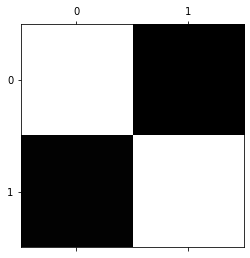

In [18]:
plt.matshow(train_conf, cmap = matplotlib.cm.gray)
plt.show()

In [19]:
y_test_pred = final_model.predict(X_test)

final_score = roc_auc_score(y_test, y_test_pred)
print('The Final ROC score is :',final_score)

The Final ROC score is : 0.9433994404675061
